In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.pipeline import Pipeline

from sklearn.decomposition import KernelPCA
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

In [7]:
data = pd.read_excel("../Data/Matrix_Apr10.xlsx", sheetname='total')
#data = pd.read_csv("../Data/Matrix_Total_pi_ph.csv")

#data['growth'] = np.where(data['Y'] <= np.mean(data.Y) - np.std(data.Y), "NEGATIVE", np.where(data['Y'] >= np.mean(data.Y) + np.std(data.Y), "HIGH_GROWTH", "NORMAL_GROWTH"))
# data['growth'] = np.where(data['Y'] <= np.mean(data.Y), "BELOW AVERAGE", "ABOVE AVERAGE")
data['growth'] = np.where(data['Y'] >= np.mean(data.Y)+np.std(data.Y), "HIGH GROWTH", "NOT HIGH GROWTH")
#data['growth'] = np.where(data['Y'] >= 0.1, "HIGH GROWTH", "NOT HIGH GROWTH")


le = LabelEncoder()
le.fit(data.growth.values)

LabelEncoder()

In [8]:
year_data_dict = {}
minYear = data.Years.min()
maxYear = data.Years.max()

for year in range(minYear, maxYear+1):
    year_data_dict[year] = data[data.Years == year]

In [9]:
year_data_dict[2015]

,postal_code,Years,useful,funny,cool,Price,use_change,fun_change,coo_change,pri_change,...,sta_std,reviews_perc,prev_stars,Star_change,NumBsqft_Rev,Bsqft_change,t-1,t-2,Y,growth
6,15003,2015,0.901639,0.327869,0.475410,2.076923,0.179067,0.857923,1.309133,0.002653,...,1.327926,0.001568,4.411765,-0.033880,9.384615,3.066667,0.017544,0.000000,0.120690,HIGH GROWTH
8,15009,2015,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000026,5.000000,-0.800000,0.040816,0.000000,0.062201,0.066327,0.045045,NOT HIGH GROWTH
13,15015,2015,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000026,5.000000,-0.800000,1.111111,0.000000,0.051383,0.063025,0.078947,HIGH GROWTH
22,15017,2015,0.666667,0.139089,0.263789,1.773585,-0.318008,-0.312284,-0.085303,-0.000127,...,1.498135,0.010716,3.460674,0.000623,32.076923,4.415584,0.052885,0.029703,0.054795,NOT HIGH GROWTH
28,15024,2015,0.333333,0.222222,0.111111,1.625000,-0.452381,0.703704,-0.680556,-0.230263,...,1.878238,0.000231,3.217391,-0.205706,0.538922,0.000000,0.025907,0.048913,0.010101,NOT HIGH GROWTH
35,15025,2015,0.588235,0.264706,0.323529,2.300000,-0.215686,0.482353,0.294118,0.150000,...,1.501336,0.000874,3.714286,-0.041855,2.048193,1.428571,0.055556,0.000000,0.105263,HIGH GROWTH
39,15034,2015,1.062500,0.562500,0.437500,2.250000,1.125000,0.000000,0.000000,0.125000,...,1.784190,0.000411,3.375000,0.074074,16.000000,2.200000,0.030000,0.075269,0.077670,HIGH GROWTH
44,15035,2015,0.583333,0.250000,0.250000,1.600000,-0.416667,0.000000,0.000000,0.066667,...,1.164500,0.000308,5.000000,-0.216667,30.000000,5.000000,0.044444,0.022727,0.053191,NOT HIGH GROWTH
49,15037,2015,0.617647,0.029412,0.058824,1.666667,1.117647,-0.764706,0.411765,-0.027778,...,1.517574,0.000874,3.916667,0.021277,1.283019,1.833333,0.037975,0.012821,0.036585,NOT HIGH GROWTH
59,15044,2015,0.682540,0.179894,0.264550,1.909091,-0.130096,-0.025573,-0.374699,0.036364,...,1.545840,0.004857,3.815385,-0.083355,4.576271,2.780000,0.040650,0.055794,0.050781,NOT HIGH GROWTH


In [10]:
train_year = 2015
year_data = year_data_dict[train_year]
x_train = year_data.drop(['Y', 'postal_code', 'Years', 'growth'], axis =1)
y_train = year_data.growth
clf = DecisionTreeClassifier(max_depth=3, class_weight="balanced")
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
test_year = 2016
test_data = year_data_dict[test_year]
x_test = test_data.drop(['Y', 'postal_code', 'Years', 'growth'], axis =1)
y_test = test_data.growth
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  7]
 [26 53]]
                 precision    recall  f1-score   support

    HIGH GROWTH       0.04      0.12      0.06         8
NOT HIGH GROWTH       0.88      0.67      0.76        79

    avg / total       0.81      0.62      0.70        87



### Using LOO Cross-Validation

In [12]:
classifiers = {}
classifier_parameters = {}

classifiers['Decision Tree'] = Pipeline([('clf', DecisionTreeClassifier())])
classifier_parameters['Decision Tree'] = {'clf__max_depth':(3, 9, 12, 15), 'clf__class_weight': (None, "balanced")}

classifiers['kNN'] = Pipeline([('clf', neighbors.KNeighborsClassifier())])
classifier_parameters['kNN'] = {'clf__n_neighbors':(3,5,7), 'clf__weights': ('uniform', 'distance')}

In [13]:
def bestModel(year_data_dict, classifiers, train_year):

    # Create a label encoder to transform output labels.
    #le = LabelEncoder() 

    year_data = year_data_dict[train_year]
    x_train = year_data.drop(['Y', 'postal_code', 'Years', 'growth'], axis =1)
    y_train = year_data.growth

    # Split features and class into two dataframes.
    X_training = x_train.values
    y_training = le.transform(y_train.values)
    # Initialize scores dictionary
    scores = pd.DataFrame(columns=['fold', 'algorithm', 'parameters', 'accuracy', 'precision', 'recall', 'kappa', 'f1_score'])

    # 10 fold CV
    loo = LeaveOneOut()

    # Outer Cross Validation
    fold = 0
    for train_index, test_index in loo.split(X_training):
        X_train, X_test = X_training[train_index], X_training[test_index]
        Y_train, Y_test = y_training[train_index], y_training[test_index]

        fold = fold + 1

        # Inner CV
        for name, clf in classifiers.items():
            if fold % 10 ==0:
                print(name + ". Fold: " + str(fold))
            if name in classifier_parameters:
                gs = GridSearchCV(estimator=clf, param_grid=classifier_parameters[name])
                gs.fit(X_train, Y_train)
                y_pred = gs.predict(X_test)
                best_params = str(gs.best_params_)
            else:
                clf.fit(X_train, Y_train)
                y_pred = clf.predict(Y_test)
                best_params = 'default'

            # collect the scores for printing out later
            scores = scores.append(pd.DataFrame(data={'fold':[fold],
                                                      'algorithm':[name], 
                                                      'parameters':[best_params], 
                                                      'accuracy':[accuracy_score(Y_test, y_pred)], 
                                                      'precision':[precision_score(Y_test, y_pred)],
                                                      'recall':[recall_score(Y_test, y_pred)],
                                                      'kappa':[cohen_kappa_score(Y_test, y_pred)],
                                                      'f1_score':[f1_score(Y_test, y_pred)]}), 
                                   ignore_index=True)
    #Extract best model        
    models = scores[['algorithm', 'accuracy', 'precision', 'recall', 'kappa', 'f1_score']].groupby(['algorithm']).mean()
    best_model = models.ix[np.where(models.f1_score == max(models.f1_score))].index.values[0]
    
    #Extract the parameters for the best model
    f1_scores = scores[['algorithm', 'f1_score', 'parameters']][scores['algorithm'] == best_model].groupby(['parameters']).mean()
    best_param = f1_scores.ix[np.where(f1_scores.f1_score == max(f1_scores.f1_score))].index.values
    print("Best Param: " + best_param)
    #Convert string to dictionary
    best_param = ast.literal_eval(best_param[0])
    
    # Train the final model with all the training data
    if best_model == "Decision Tree":
        final_model = Pipeline([('clf', DecisionTreeClassifier())])
    elif best_model == "kNN":
        final_model = Pipeline([('clf', neighbors.KNeighborsClassifier())])
    final_model.set_params(**best_param).fit(X_training, y_training)
    
    test_year = train_year+1
    test_data = year_data_dict[test_year]
    x_test = test_data.drop(['Y', 'postal_code', 'Years', 'growth'], axis =1)
    y_test = le.fit_transform(test_data.growth)
    y_pred = final_model.predict(x_test)
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    test_f1Score = f1_score(y_test, y_pred)
    
    #Get baseline prediction (previous year growth)
    prev_year_pred = pd.DataFrame(year_data_dict[train_year][['postal_code', 'growth']])
    prev_growth = prev_year_pred.merge(test_data, on="postal_code")
    prev_growth = prev_growth[['growth_x', 'growth_y']]
    prev_growth.columns = ['growth_tminus1', 'growth_tplus1']
    y_true = le.transform(prev_growth.growth_tplus1)
    y_pred_baseline = le.transform(prev_growth.growth_tminus1)
    baseline_f1Score = f1_score(y_true, y_pred_baseline)
    
    return test_f1Score, baseline_f1Score

In [14]:
bestModel(year_data_dict=year_data_dict,classifiers=classifiers, train_year=2012)

/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


kNN. Fold: 10
Decision Tree. Fold: 10
kNN. Fold: 20
Decision Tree. Fold: 20
kNN. Fold: 30
Decision Tree. Fold: 30
kNN. Fold: 40
Decision Tree. Fold: 40
kNN. Fold: 50
Decision Tree. Fold: 50


/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


kNN. Fold: 60
Decision Tree. Fold: 60


/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


kNN. Fold: 70
Decision Tree. Fold: 70
["Best Param: {'clf__weights': 'uniform', 'clf__n_neighbors': 3}"]
Confusion Matrix: 
[[ 0 12]
 [ 0 68]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        12
          1       0.85      1.00      0.92        68

avg / total       0.72      0.85      0.78        80



/Users/jamiediner/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.91891891891891886, 0.93617021276595747)

### Get performance for all the years

In [15]:
minYear = 2011
maxYear = 2016

results = pd.DataFrame(columns=["Years", "Model F1-Score", "Baseline F1-Score"])

for year in range(minYear, maxYear):
    print("Year: " + str(year))
    model_f1, baseline_f1 = bestModel(year_data_dict=year_data_dict,classifiers=classifiers, train_year=year)
    results = results.append(pd.DataFrame(data={"Years": [int(year)], "Model F1-Score": [model_f1], "Baseline F1-Score": [baseline_f1]}))
    
results.Years = results.Years.astype(int)
a = results[['Baseline F1-Score', 'Model F1-Score']]
a.index = results.Years

Year: 2011
kNN. Fold: 10
Decision Tree. Fold: 10
kNN. Fold: 20
Decision Tree. Fold: 20
kNN. Fold: 30
Decision Tree. Fold: 30
kNN. Fold: 40
Decision Tree. Fold: 40
kNN. Fold: 50
Decision Tree. Fold: 50
kNN. Fold: 60
Decision Tree. Fold: 60
["Best Param: {'clf__max_depth': 3, 'clf__class_weight': None}"]
Confusion Matrix: 
[[ 1  1]
 [ 0 75]]
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.99      1.00      0.99        75

avg / total       0.99      0.99      0.98        77

Year: 2012
kNN. Fold: 10
Decision Tree. Fold: 10
kNN. Fold: 20
Decision Tree. Fold: 20
kNN. Fold: 30
Decision Tree. Fold: 30
kNN. Fold: 40
Decision Tree. Fold: 40
kNN. Fold: 50
Decision Tree. Fold: 50
kNN. Fold: 60
Decision Tree. Fold: 60
kNN. Fold: 70
Decision Tree. Fold: 70
["Best Param: {'clf__max_depth': 12, 'clf__class_weight': 'balanced'}"
 "Best Param: {'clf__max_depth': 15, 'clf__class_weight': 'balanced'}"
 "Best Param: {'clf__max

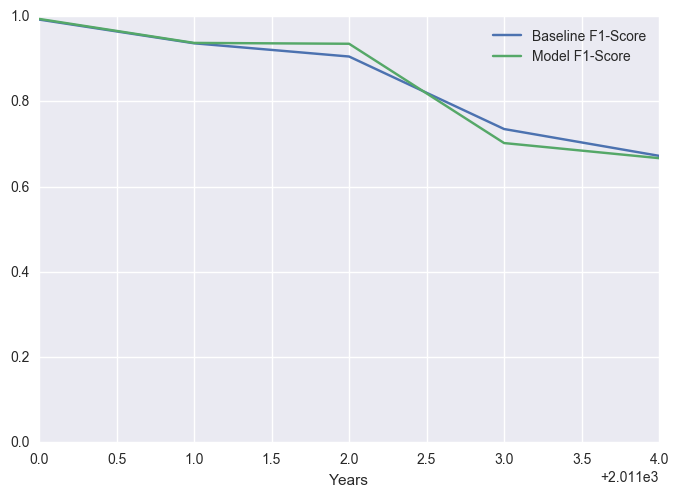

In [16]:
a.plot(xlim=(2011, 2015), ylim=(0,1))
plt.show()

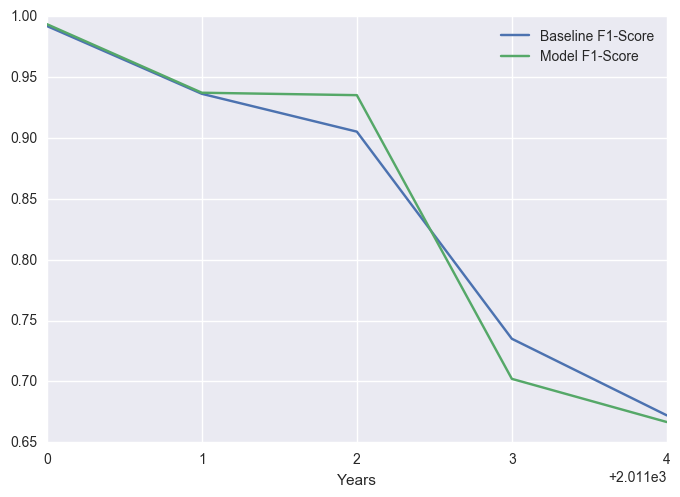

In [17]:
results.plot(x = 'Years', y = ['Baseline F1-Score', 'Model F1-Score'], xticks=range(2011, 2016))
plt.show()